## Libraries

In [1]:
import sys
sys.path.append('../utils')

from preprocessing import Preprocessor
from preprocessing import Analytics

import matplotlib.pyplot as plt
import numpy as np
import random
import os

try:
    from sklearn.cross_validation import train_test_split
except ImportError:
    from sklearn.model_selection import train_test_split  

from PIL import Image

import tensorflow as tf
import tensorflow.contrib.layers as layers

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Const params

In [11]:
image_size = 128
SEED = 42
DATASET_PATH = '../input/'

random.seed(SEED)
tf.set_random_seed(SEED)

## Load the data

In [12]:
wnids = Preprocessor.get_dataset_wnids()
wnid_to_lable = Preprocessor.get_wnid_table()
dataset = Preprocessor.get_dataset_paths_from_wnid(wnids)
wnid_to_one_hot = Preprocessor.create_wnid_to_one_hot(wnids)

## Exploritory analysis

In [13]:
print 'Dataset size:', len(dataset)
print 'Class number:', len(wnids)

Dataset size: 16578
Class number: 15


In [14]:
lables = [wnid_to_lable[wnid] for wnid in wnids]
print 'Lables:', lables

Lables: ['vedalia, Rodolia cardinalis', 'red fox, Vulpes fulva', 'trumpeter, trumpeter swan, Cygnus buccinator', 'Asiatic black bear, black bear, Ursus thibetanus, Selenarctos thibetanus', 'Hippodamia convergens', 'whitetip shark, reef whitetip shark, Triaenodon obseus', 'red wolf, maned wolf, Canis rufus, Canis niger', 'black swan, Cygnus atratus', 'tundra swan, Cygnus columbianus', 'wandering albatross, Diomedea exulans', 'black-footed albatross, gooney, gooney bird, goonie, goony, Diomedea nigripes', 'shovelhead, bonnethead, bonnet shark, Sphyrna tiburo', 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 'Mexican bean beetle, bean beetle, Epilachna varivestis', 'two-spotted ladybug, Adalia bipunctata']


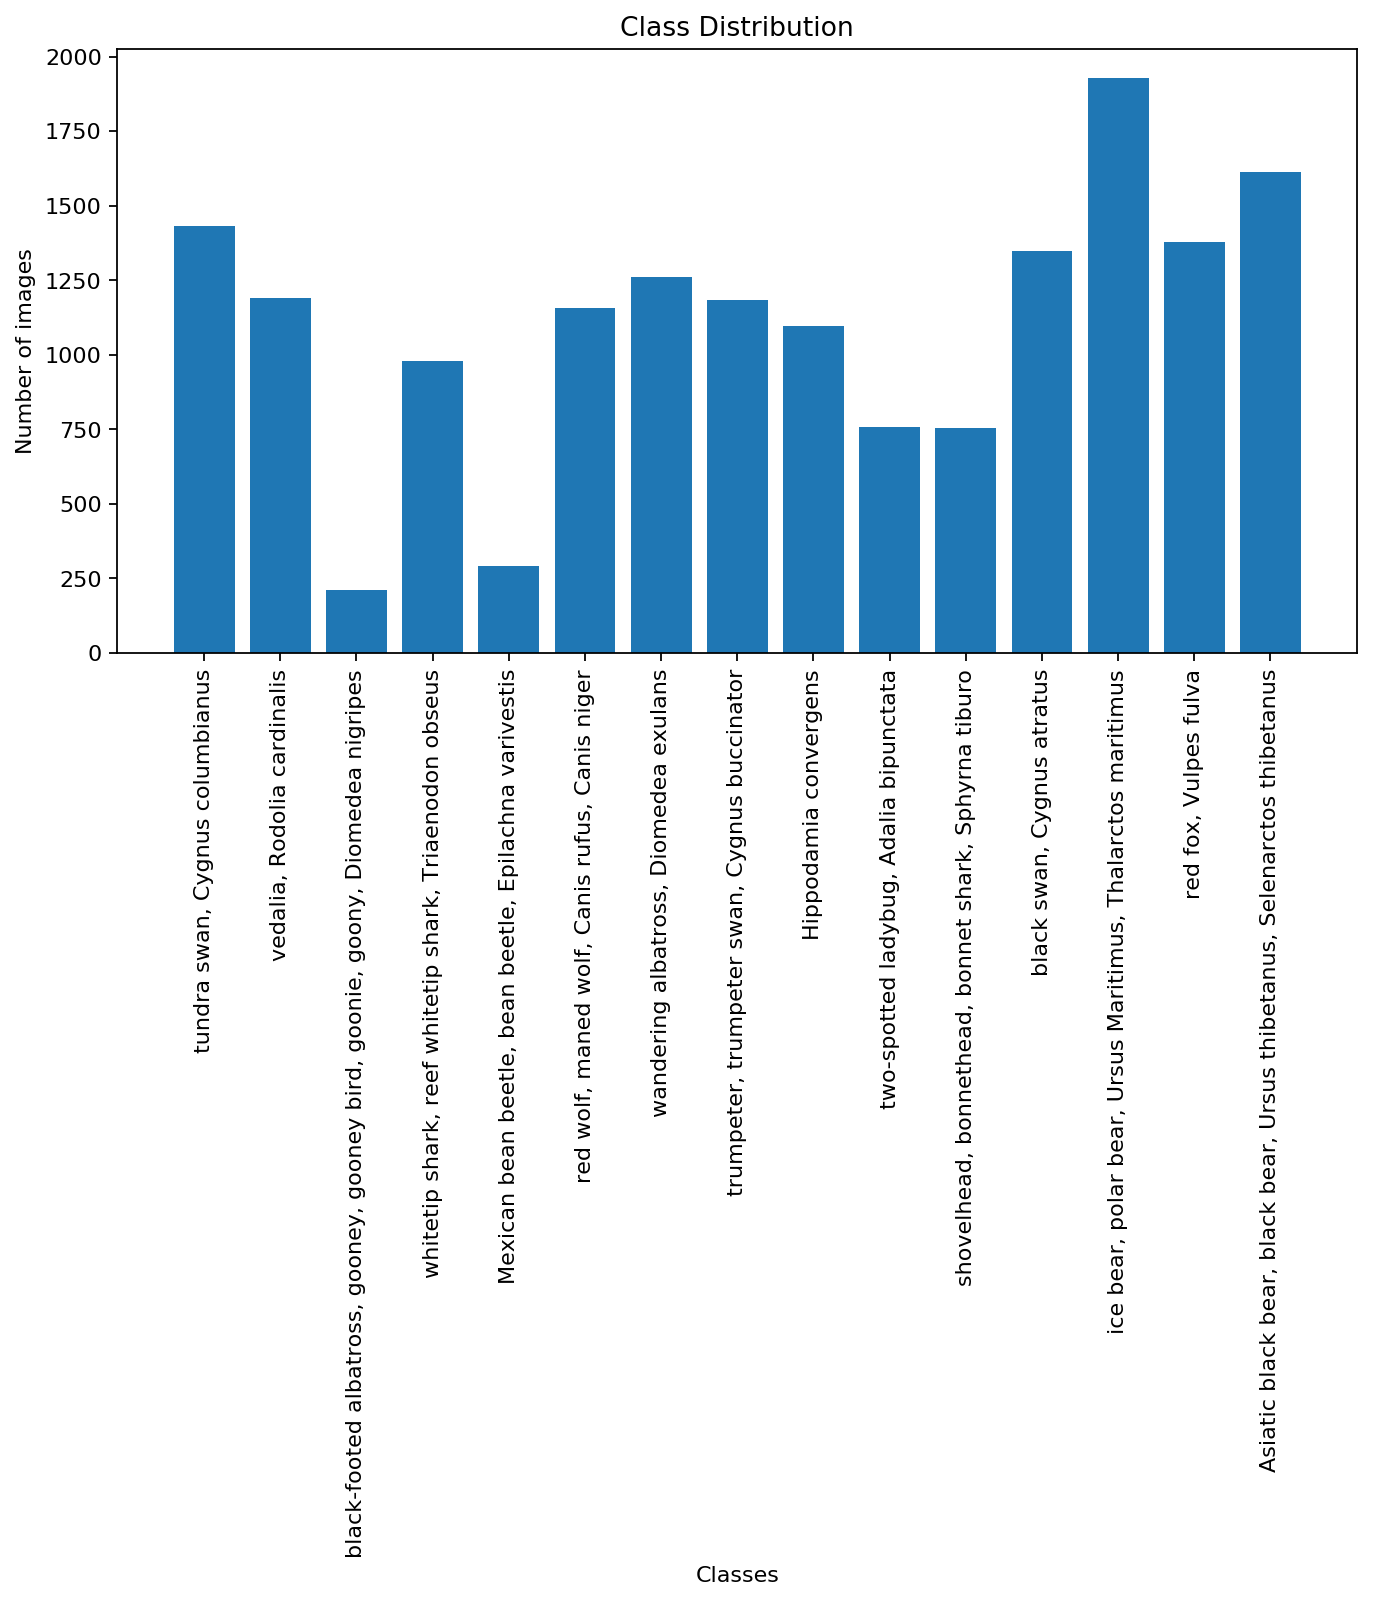

In [15]:
Analytics.set_image_size(10, 5)
class_distribution = Analytics.extract_class_distribution(dataset)
classes = map(lambda x: wind_table[x], class_distribution.keys())

plt.bar(range(len(class_distribution)), class_distribution.values(), align='center')
plt.xticks(range(len(class_distribution)), classes, rotation='vertical')
plt.title('Class Distribution')
plt.ylabel('Number of images')
plt.xlabel('Classes')
plt.show()

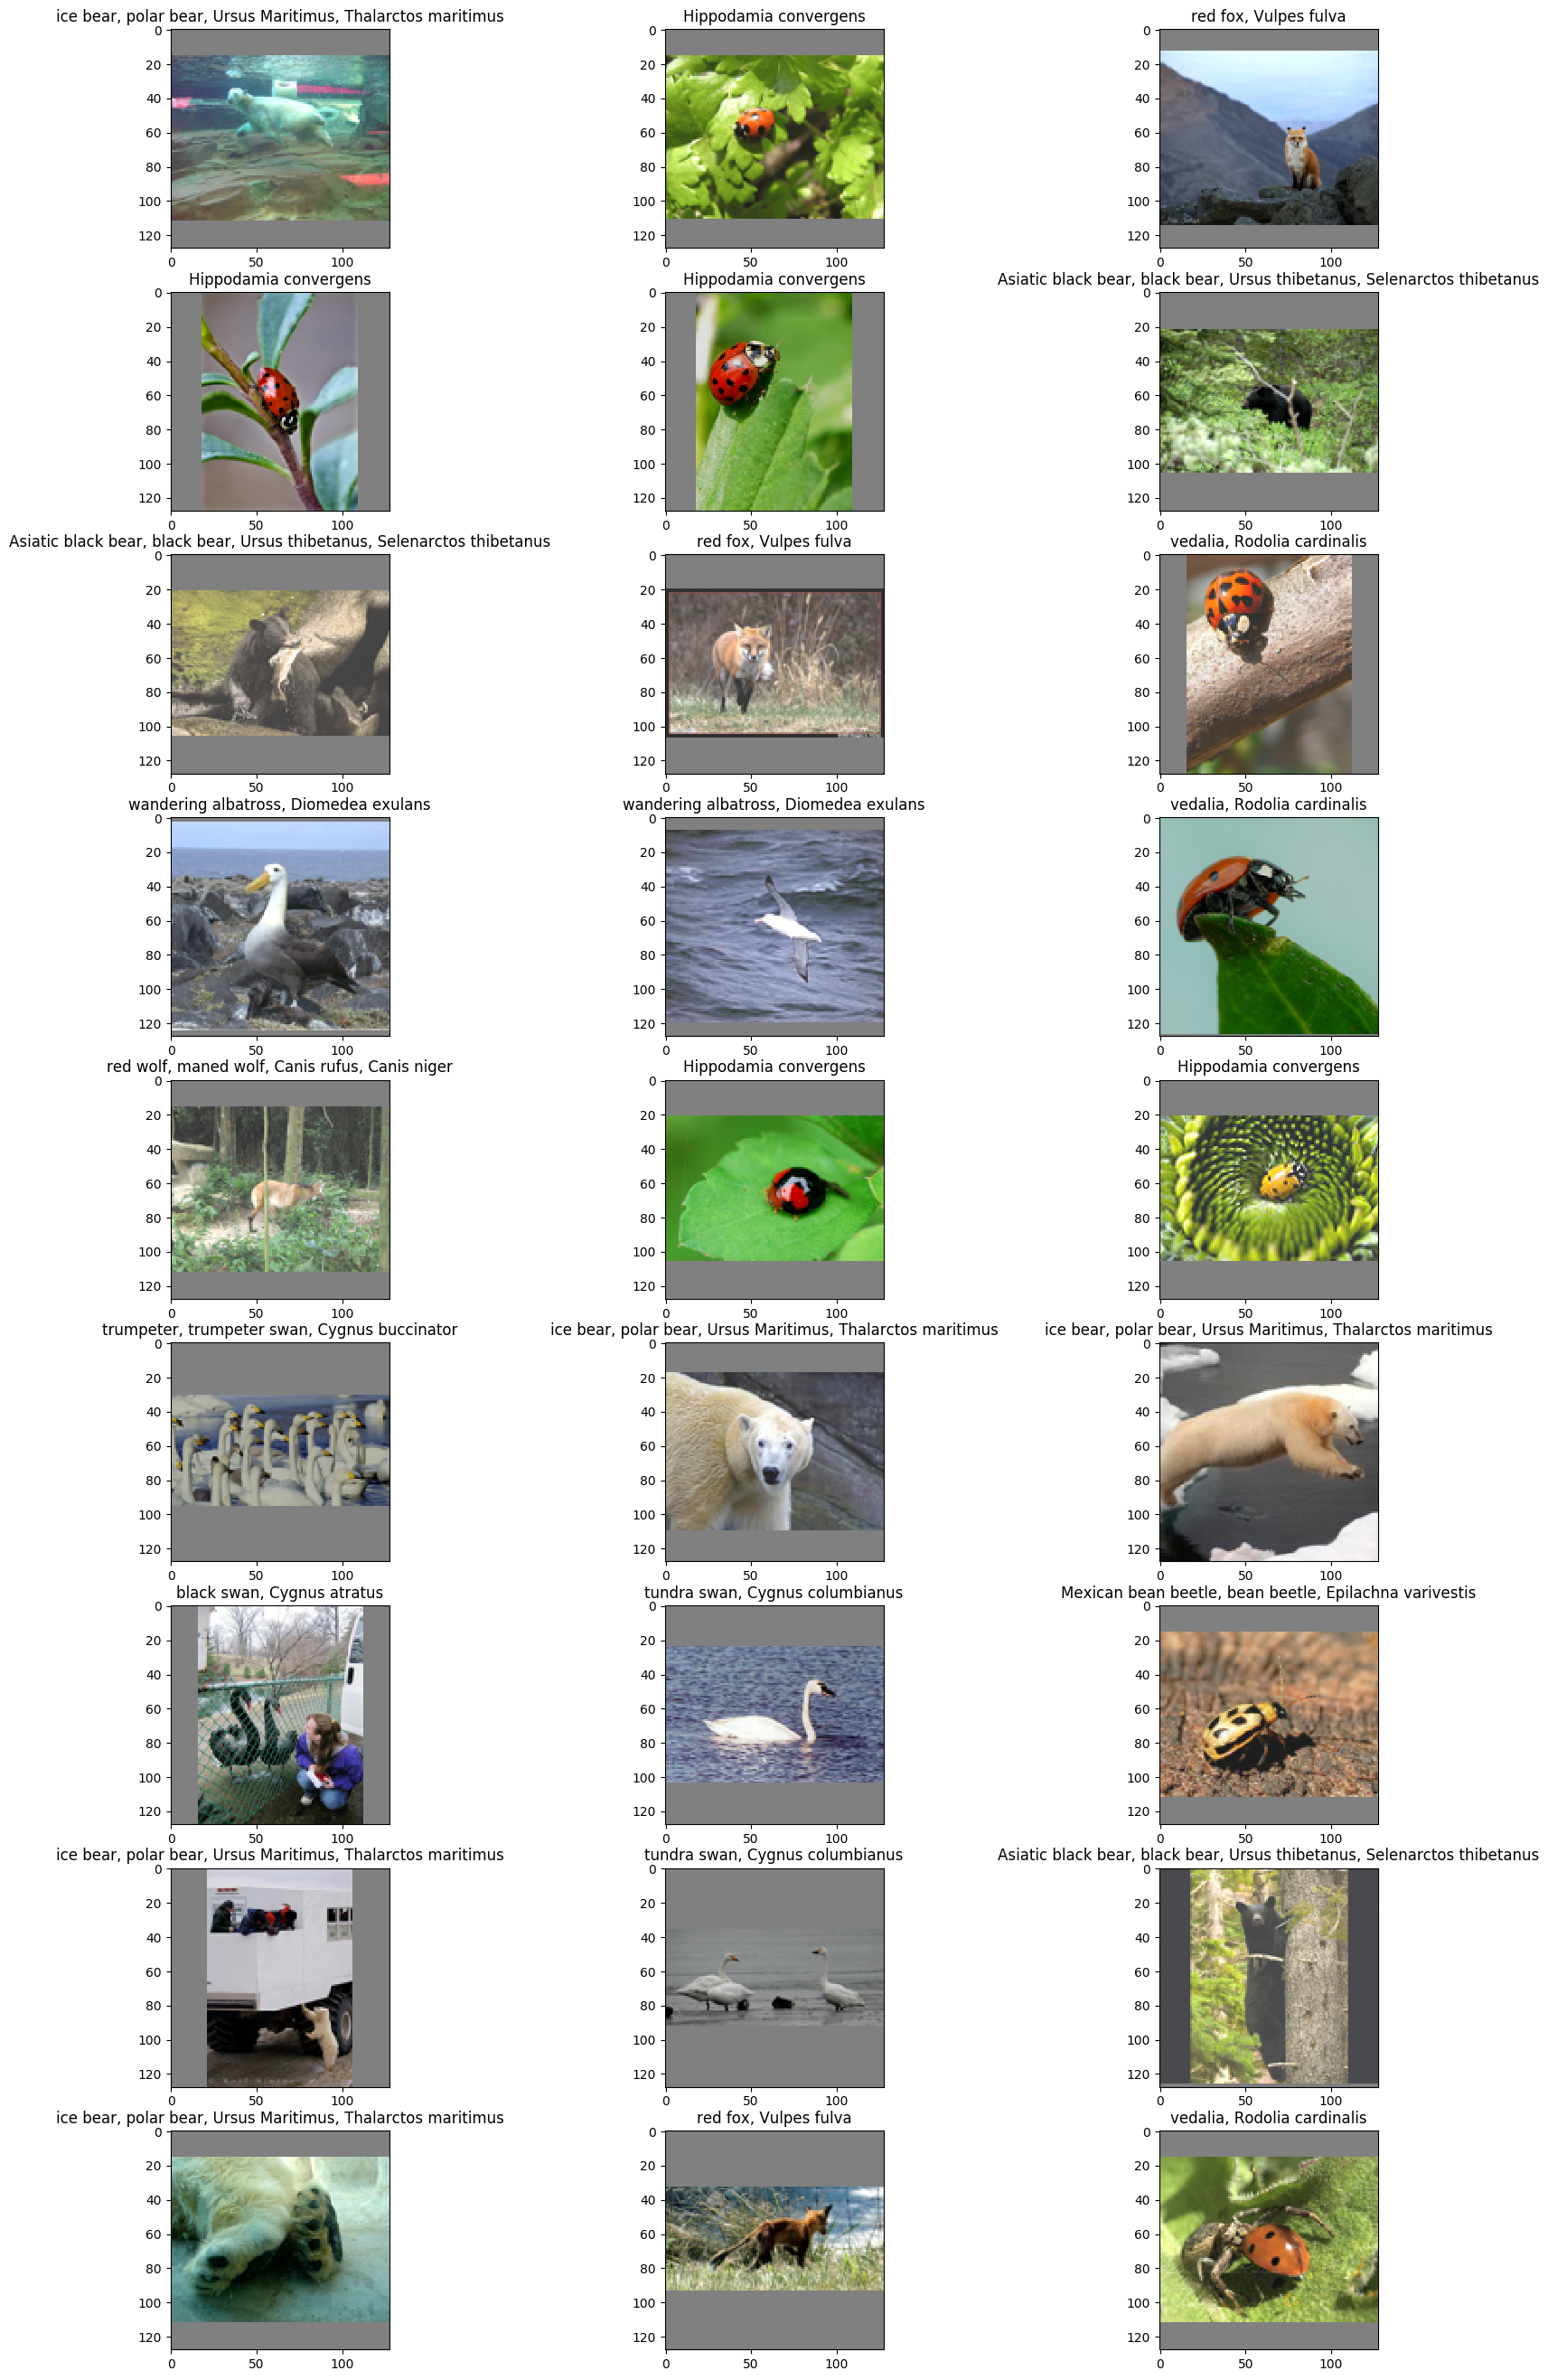

In [52]:
Analytics.set_image_size(20, 34, 100)

for i in range(1, 28):
    plt.subplot(9, 3, i)
    
    random_index = np.random.randint(0, len(dataset))
    image_path = dataset[random_index]
    image = Preprocessor.get_image(image_path)

    processed_image = Preprocessor.get_processed_image(image, size=image_size)
    
    wnid = Preprocessor.extract_wnid(image_path)
    plt.title(wnid_to_lable[wnid])
    
    plt.imshow(processed_image)
    
    
plt.show()

## Create the dataset